In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
plt.style.use('ggplot')
mpl.rcParams['figure.dpi'] = 150

In [2]:
engine = create_engine("sqlite:///GDS.db")
df = pd.read_sql_table('Emissions_Data_Joined', engine)
df_sectors = pd.read_sql_table('Sectors', engine)

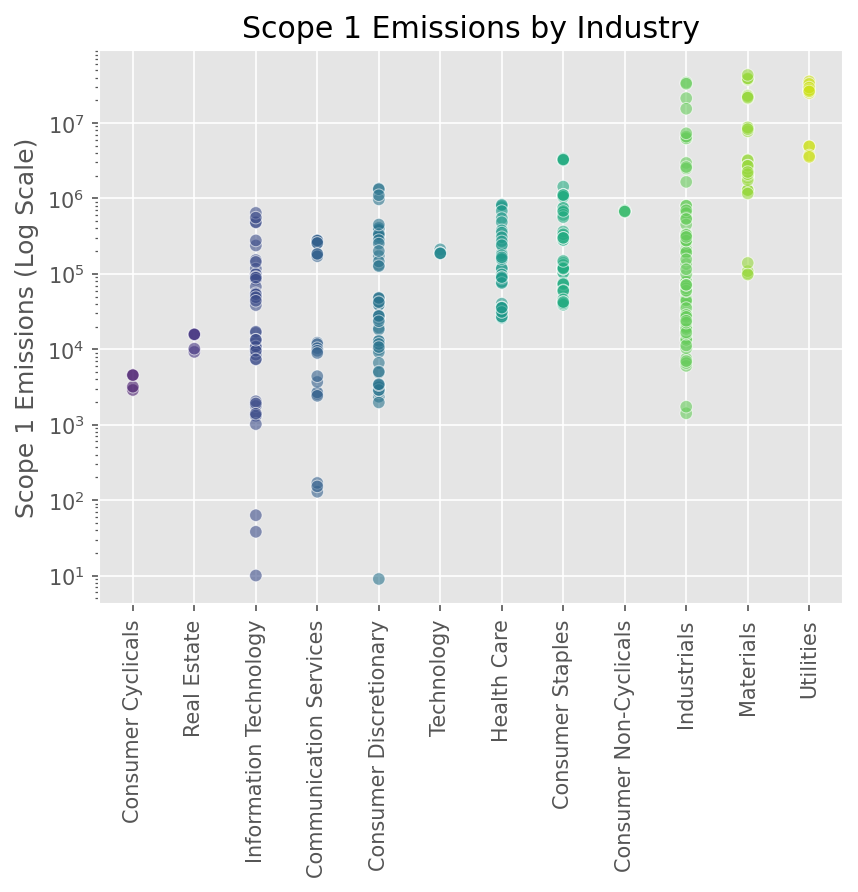

In [3]:
df_plot = df[['Company Name', 'Scope_1_emissions_(tCO₂e)']].merge(
    df_sectors, on='Company Name').loc[df['Scope_1_emissions_(tCO₂e)']!='-']

df_plot['Scope_1_emissions_(tCO₂e)'] = df_plot['Scope_1_emissions_(tCO₂e)'].astype(int)

industries_sorted = df_plot.groupby('Industry').mean().sort_values(by='Scope_1_emissions_(tCO₂e)').index
df_plot['Industry'] = pd.Categorical(df_plot['Industry'], industries_sorted)

sns.scatterplot(df_plot.sort_values('Industry'), alpha=0.6, x='Industry', y='Scope_1_emissions_(tCO₂e)',
                 hue='Industry', palette='viridis', legend=False)
plt.yscale("log")
plt.ylabel('Scope 1 Emissions (Log Scale)')
plt.xlabel('')
plt.xticks(rotation=90)
plt.title('Scope 1 Emissions by Industry')
plt.show()

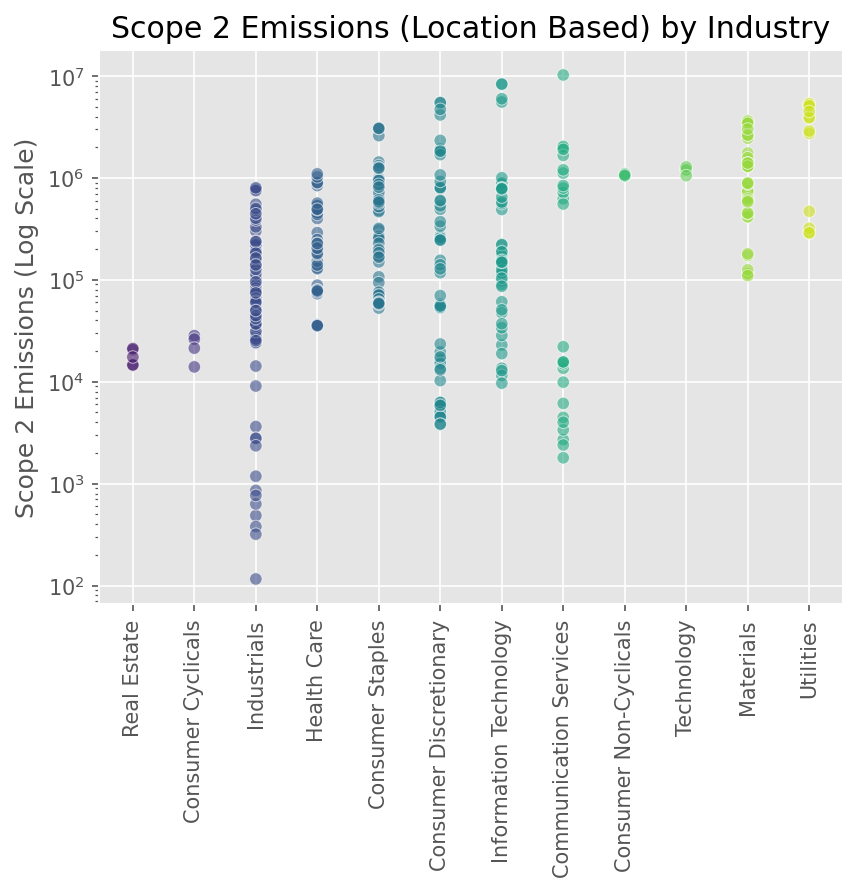

In [4]:
df_plot = df[['Company Name', 'Scope_2_emissions_(tCO₂e)_Location']].merge(
    df_sectors, on='Company Name').loc[df['Scope_2_emissions_(tCO₂e)_Location']!='-']

df_plot['Scope_2_emissions_(tCO₂e)_Location'] = df_plot['Scope_2_emissions_(tCO₂e)_Location'].astype(int)

industries_sorted = df_plot.groupby('Industry').mean().sort_values(by='Scope_2_emissions_(tCO₂e)_Location').index
df_plot['Industry'] = pd.Categorical(df_plot['Industry'], industries_sorted)

sns.scatterplot(df_plot.sort_values('Industry'), alpha=0.6, x='Industry', y='Scope_2_emissions_(tCO₂e)_Location',
                 hue='Industry', palette='viridis', legend=False)
plt.yscale("log")
plt.ylabel('Scope 2 Emissions (Log Scale)')
plt.xlabel('')
plt.xticks(rotation=90)
plt.title('Scope 2 Emissions (Location Based) by Industry')
plt.show()

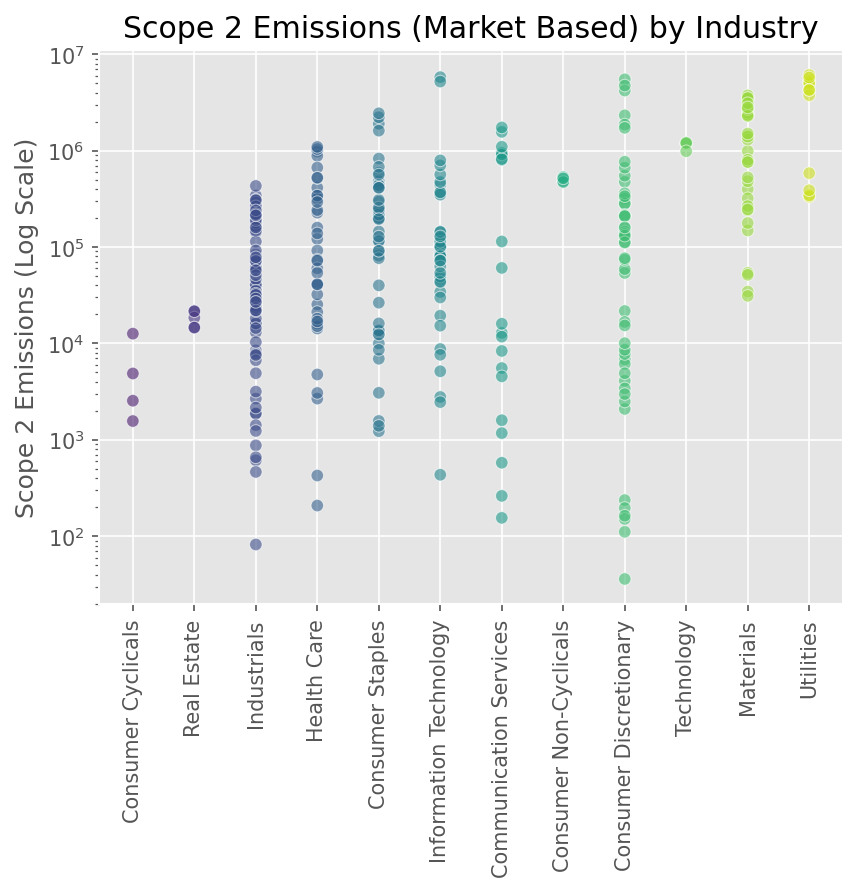

In [5]:
df_plot = df[['Company Name', 'Scope_2_emissions_(tCO₂e)_Market']].merge(
    df_sectors, on='Company Name').loc[df['Scope_2_emissions_(tCO₂e)_Market']!='-']

df_plot['Scope_2_emissions_(tCO₂e)_Market'] = df_plot['Scope_2_emissions_(tCO₂e)_Market'].astype(int)

industries_sorted = df_plot.groupby('Industry').mean().sort_values(by='Scope_2_emissions_(tCO₂e)_Market').index
df_plot['Industry'] = pd.Categorical(df_plot['Industry'], industries_sorted)

sns.scatterplot(df_plot.sort_values('Industry'), alpha=0.6, x='Industry', y='Scope_2_emissions_(tCO₂e)_Market',
                 hue='Industry', palette='viridis', legend=False)
plt.yscale("log")
plt.ylabel('Scope 2 Emissions (Log Scale)')
plt.xlabel('')
plt.xticks(rotation=90)
plt.title('Scope 2 Emissions (Market Based) by Industry')
plt.show()